# IS 362 - Assignment 13
### Preprocessing Data for scikit-learn

Assignment Tasks:
- Study dataset and the associated description of the data.
- Create pandas DataFrame with a subset of the columns in the dataset. The columns should indicate edible or    poisonous, odor, and one other column. 
- Add names for each columns.
- Replace the codes used in the data with numeric values. 
- Perform exploratory data analysis: show the distribution of data for each of the columns selected and show scatterplots for edible/poisonus vs. odor as well as the other column selected. 
- Include some text describing proliminary conclusions about whether either of the other columns could be helpful in predicting if specific mushroom is edible or poisonus. 

First, we obtain data documentation

Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

Next, we will import all necessary libraries

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In the next step we will create pandas DataFrame and add column names

In [33]:
# reads data from url
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                    sep = ',',header = None, usecols=[0, 5, 21], names = ['Classification', 'Odor', 'Population'])

data.head()

,Classification,Odor,Population
0,p,p,s
1,e,a,n
2,e,l,n
3,p,p,s
4,e,n,a


In this step we will replace the letters in the columns with numerical values

In [34]:
# replaces column's letters with numbers
data.replace(to_replace={'Classification':{'e': 0, 'p': 1}}, inplace = True)
data.replace(to_replace={'Odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace = True)
data.replace(to_replace={'Population':{'a':0, 'c':1, 'n':2, 's':3, 'v':4, 'y':5}}, inplace = True)

data.head()

,Classification,Odor,Population
0,1,7,3
1,0,0,2
2,0,1,2
3,1,7,3
4,0,6,0


In this step we can start data analysis by displaying count of edible and poisonous where 0 = edable and 1 = poisonous

In [35]:
# counts mushroom types
mushroom_count = data['Classification'].value_counts()
mushroom_count

0    4208
1    3916
Name: Classification, dtype: int64

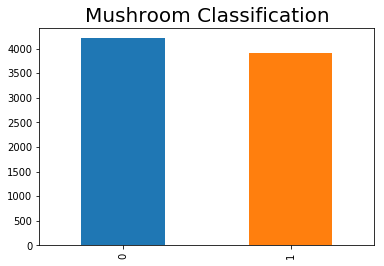

In [36]:
# compares edible to poisonous
plt.title('Mushroom Classification', fontsize = 20)
mushroom_count.plot(kind = "bar")

Text(0.5,1,'Classification vs Odor')

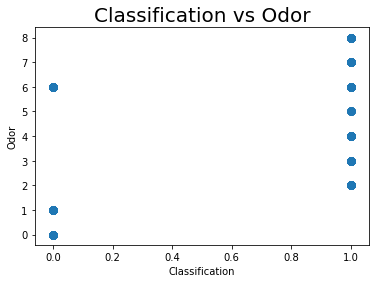

In [38]:
# analyses mushroom type vs odor
data.plot.scatter(x='Classification', y='Odor', s=50)
plt.title('Classification vs Odor', fontsize = 20)

0.0 on the Classification axis represent edible mushrooms and 1.0 represent poisonous mushrooms. Numbers from 0 to 8 on the Odor axis represent Odor attributes as listed below. The scatter plot above indicates that edible mushrooms have most likely odor of almond, anise or none. Although, nune odor can indicate the mushroom is either edible or poisonous. Mushrooms with odor of creoste, fishy, foul, musty, none, pungent, spicy are most likely poisonous. 
* 0 - almond
* 1 - anise
* 2 - creosote
* 3 - fishy
* 4 - foul
* 5 - musty
* 6 - none
* 7 - pungent
* 8 - spicy


Text(0.5,1,'Classification vs Population')

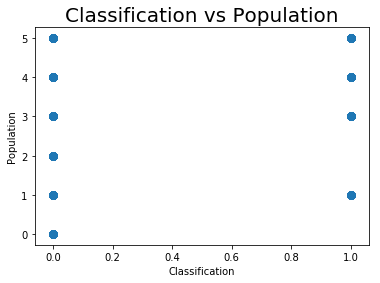

In [39]:
# analyses mushroom type vs population
data.plot.scatter(x='Classification', y='Population', s=50)
plt.title('Classification vs Population', fontsize = 20)

0.0 on the Classification axis represent edible mushrooms and 1.0 represent poisonous mushrooms. Numbers from 0 to 5 on the Population axis represent Population attributes as listed below. The scatter plot above indicates that edible mushrooms have abundant, clustered, numerous, scattered, several, solitary attributes where poisonous mushrooms have clustered, scattered, several and solitary attributes. 
* 0 - abundant
* 1 - clustered
* 2 - numerous
* 3 - scattered
* 4 - several
* 5 - solitary